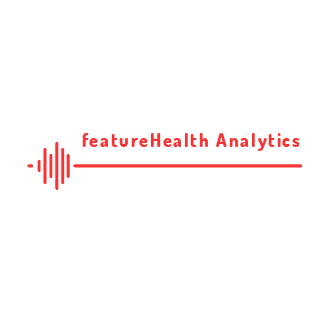

In [42]:
from IPython.display import Image
Image("logo.png")

Data Preperation

In [43]:
import pandas as pd
import numpy as np
from itertools import chain
from sklearn.decomposition import PCA

## Class Definition

(please see https://github.com/chenson2018/Humana-Mays-Competition/blob/master/Final%20Model/humana_class.py if you would like to view how features were extracted)

In [44]:
from humana_class import DataPrep

## Read in training/holdout and extract features

In [45]:
training = pd.read_csv('HMAHCC_COMP.csv')
test = pd.read_csv('HMAHCC_HOLDOUT.csv')

C:\Users\cgn31\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
training.columns

Index(['id', 'event_descr', 'event_attr1', 'event_attr2', 'event_attr3',
       'event_attr4', 'event_attr5', 'event_attr6', 'event_attr7',
       'event_attr8', 'event_attr9', 'event_attr10', 'Days',
       'PAY_DAY_SUPPLY_CNT', 'PAYABLE_QTY', 'MME', 'DRUG_TYPE', 'Specialty',
       'Specialty2', 'Specialty3'],
      dtype='object')

In [47]:
test = test[['ID', 'EVENT_DESCR', 'EVENT_ATTR1', 'EVENT_ATTR2', 'EVENT_ATTR3',
       'EVENT_ATTR4', 'EVENT_ATTR5', 'EVENT_ATTR6', 'EVENT_ATTR7',
       'EVENT_ATTR8', 'EVENT_ATTR9', 'EVENT_ATTR10','days', 'PAY_DAY_SUPPLY_CNT',
       'PAYABLE_QTY', 'MME', 'DRUG_TYPE', 'SPECIALTY', 'SPECIALTY2',
       'SPECIALTY3']]

test.columns = training.columns
test

,id,event_descr,event_attr1,event_attr2,event_attr3,event_attr4,event_attr5,event_attr6,event_attr7,event_attr8,event_attr9,event_attr10,Days,PAY_DAY_SUPPLY_CNT,PAYABLE_QTY,MME,DRUG_TYPE,Specialty,Specialty2,Specialty3
0,ID98975196852,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,AMBIEN,ZOLPIDEM TARTRATE TAB 10 MG,2.45421e+07,180,510.00,NaN,-964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID98975196852,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,AMBIEN,ZOLPIDEM TARTRATE TAB 10 MG,2.45421e+07,90,255.00,NaN,-964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID98975196852,RX Claim - Rejected,PRE-AUTH CLM,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,AMBIEN,ZOLPIDEM TARTRATE TAB 10 MG,2.45421e+07,10,63.15,NaN,-964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID98975196852,RX Claim - New Drug,492700,PROTON PUMP INHIBITORS,OMEPRAZOLE,006,GASTRO,NaN,NaN,OMEPRAZOLE CAP DELAYED RELEASE 20 MG,7.15,49270060.0,-963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID98975196852,RX Claim - Paid,PROTON PUMP INHIBITORS,NaN,7.15,0,OMEPRAZOLE,GASTRO,NaN,OMEPRAZOLE CAP DELAYED RELEASE 20 MG,7.15,49270060.0,-963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ID98975196852,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,LEXAPRO,ESCITALOPRAM OXALATE TAB 5 MG (BASE EQUIV),4.56201e+08,90,255.00,NaN,-963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ID98975196852,RX Claim - Rejected,PRE-AUTH CLM,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,LEXAPRO,ESCITALOPRAM OXALATE TAB 5 MG (BASE EQUIV),4.56201e+08,5,34.58,NaN,-963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ID98975196852,RX Claim - New Drug,581600,SELECTIVE SEROTONIN REUPTAKE INHIBITORS (SSRIS),LEXAPRO,004,PSYCH-DEP,NaN,NaN,ESCITALOPRAM OXALATE TAB 5 MG (BASE EQUIV),119.58,58160034.0,-962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ID98975196852,RX Claim - New Drug,602040,NON-BARBITURATE HYPNOTICS,AMBIEN,013,NUISANCE-SLEEP,NaN,NaN,ZOLPIDEM TARTRATE TAB 10 MG,150.42,60204080.0,-962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ID98975196852,RX Claim - Paid,NON-BARBITURATE HYPNOTICS,NaN,186.14,35.72,AMBIEN,NUISANCE-SLEEP,NaN,ZOLPIDEM TARTRATE TAB 10 MG,150.42,60204080.0,-962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
training_class = DataPrep(training)
test_class = DataPrep(test)

In [ ]:
%%time
training_class.get_features(derive_response=True)
test_class.get_features()

In [ ]:
training_features = training_class.feature_frame
training_features

In [ ]:
test_features = test_class.feature_frame
test_features

## Model

In [11]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [12]:
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import optimizers

Using TensorFlow backend.


In [13]:
class Model:
    def __init__(self, train_set, test_set):
        self.train_set = train_set
        self.test_set = test_set
        
        X = train_set.iloc[:,1:]
        y = train_set.iloc[:,0].map(lambda x: 1 if x == True else 0 )
        
        self.X = X
        self.y = y
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.33, random_state=33)
        
        
    def Random_Forest(self):
        rf_model = RandomForestClassifier(n_estimators=300, 
                                  max_depth=10,
                                  random_state=100,
                                    max_features=0.5,
                                    min_samples_leaf=5)
        
        cv_results = cross_validate(rf_model, self.X_train, self.y_train, cv=3,
                            scoring= 'roc_auc',
                            return_train_score=True,
                            return_estimator =True)
        
        rf_model.fit(self.X_train, self.y_train)
        
        importance = pd.Series(rf_model.feature_importances_, index=self.X_train.columns)
        self.rf_importance = importance.sort_values()[-15:] # show top 15
        
        return rf_model.predict_proba(self.test_set)[:,1]
    
    def LGB(self):
        bst = lgb.LGBMClassifier(boosting_type= 'gbdt',
                        objective = 'binary',
                        max_depth = 3,
                        n_estimators = 1000)

        bst.fit(self.X_train.values, self.y_train.values)
        
        importance = pd.Series(bst.feature_importances_, index=self.X_train.columns)
        self.GBM_importance = importance.sort_values()[-15:] # show top 15
        
        return bst.predict_proba(self.test_set)[:,1]
    
    def Neural_Net(self):
        scaler = StandardScaler()
        scaler.fit(self.X)
        
        X_scale = scaler.transform(self.X)
        y_array = self.y.values
        
        X_train, X_test_s, y_train, y_test = train_test_split(X_scale, y_array, test_size=0.33, random_state=33)
        X_train_mlp, X_validation, y_train_mlp, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=33)
        
        model = Sequential()

        #First Hidden Layer
        model.add(Dense(128, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))

        #Second  Hidden Layer
        model.add(Dense(64, activation='relu', kernel_initializer='random_normal'))    
        
        #Output Layer
        model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        # add early stop to prevent overfitting
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=50)
        mc = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

        history = model.fit(X_train, y_train,
                            validation_split = 0.15,
                            epochs=4000, verbose=0, callbacks=[es, mc])

        saved_model = load_model('best_model2.h5')
        
        #scale test data
        scaler.fit(self.test_set)
        X_test_scale = scaler.transform(self.test_set)
        
        NN_predict = saved_model.predict_proba(X_test_scale)
        nn_prob = np.array([ x[0] for x in NN_predict])
        
        self.weights, self.biases = saved_model.layers[0].get_weights()
        
        return nn_prob
    
    def predict(self):
        rf_predictions = self.Random_Forest()
        lgb_predictions = self.LGB()
        nn_predictions = self.Neural_Net()
        
        self.predictions = pd.DataFrame({'LGB':lgb_predictions,
                                         'Random Forest':rf_predictions,
                                         'Neural Net':nn_predictions
                                          }, 
                                          index = self.test_set.index)

        self.predictions['Model Average'] = self.predictions.mean(axis = 1)
        self.predictions['RF+LGB'] = (self.predictions['LGB']+self.predictions['Random Forest'])/2
        
        return self.predictions

In [16]:
model = Model(train_set=training_features, test_set=test_features)
predictions = model.predict()

In [17]:
%matplotlib inline
import matplotlib.pylab as plt

Text(0.5, 0, 'Predicted Probability')

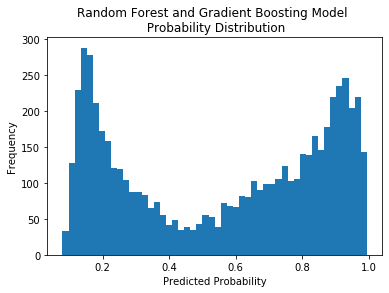

In [18]:
predictions['RF+LGB'].plot(kind = 'hist', bins = 50)
plt.title('Random Forest and Gradient Boosting Model \n Probability Distribution')
plt.xlabel('Predicted Probability')

In [19]:
predictions

,LGB,Random Forest,Neural Net,Model Average,RF+LGB
ID40721836565,0.996913,0.908425,0.988852,0.964730,0.952669
ID98975196852,0.035644,0.240362,0.167200,0.147735,0.138003
ID99208242445,0.216153,0.275403,0.157522,0.216359,0.245778
ID49984943936,0.128317,0.232753,0.091733,0.150934,0.180535
ID11087903013,0.215508,0.344699,0.244116,0.268108,0.280103
ID70649720202,0.897920,0.846300,0.939469,0.894563,0.872110
ID97618182095,0.272186,0.458506,0.469096,0.399929,0.365346
ID77178525448,0.233063,0.265047,0.176512,0.224874,0.249055
ID76985382883,0.158855,0.266640,0.195861,0.207119,0.212748
ID59418996264,0.121931,0.229235,0.164445,0.171870,0.175583


In [20]:
final_export = predictions[['RF+LGB']]
final_export = final_export.sort_values(by = ['RF+LGB'], ascending = False)
final_export = final_export.reset_index()
final_export['rank'] = pd.RangeIndex(start=1, stop=, step=1)
final_export.columns = ['ID', 'Predicted Value', 'Individual Rank']
final_export

ValueError: Length of values does not match length of index

In [ ]:
predictions['Neural Net'].plot(kind = 'hist', bins = 50)
plt.title('Neural Net \n Probability Distribution')
plt.xlabel('Predicted Probability')

In [ ]:
predictions['LGB'].plot(kind = 'hist', bins = 50)
plt.title('Gradient Boosting \n Probability Distribution')
plt.xlabel('Predicted Probability')

In [ ]:
predictions['Random Forest'].plot(kind = 'hist', bins = 50)
plt.title('Random Forest \n Probability Distribution')
plt.xlabel('Predicted Probability')

In [ ]:
predictions['Model Average'].plot(kind = 'hist')

In [ ]:
(predictions['LGB'] - predictions['Random Forest']).abs().mean()

In [ ]:
(predictions['LGB'] - predictions['Neural Net']).abs().mean()

In [ ]:
(predictions['Random Forest'] - predictions['Neural Net']).abs().mean()

## Let's try a validation set to get a feel for model accuracy:

In [ ]:
training_features

In [ ]:
blah1, validation_features, blah1, blah1 = train_test_split(training_features, training_features['LTOT'], test_size=0.33)

In [ ]:
validation_features = validation_features.iloc[:,1:]
validation_features

In [ ]:
validationModel = Model(train_set=training_features, test_set=validation_features)

In [ ]:
validation_predictions = validationModel.predict()

In [ ]:
validation_predictions

In [ ]:
thresh_list = []
fpr_list = []
tpr_list = []

for threshold in np.linspace(0, 1, num=501):
    
    validation_pred = pd.merge(validation_predictions, 
             training_features, 
             left_index=True, 
             right_index=True, 
             how = 'left').iloc[:,:6]
    
    validation_pred['LTOT Binary'] = validation_pred['LTOT'].map(lambda x: 1 if x == True else 0 )
    validation_pred['RF+LGB'] = (validation_pred['Random Forest']+validation_pred['LGB'])/2
    validation_pred['LGB+NN'] = (validation_pred['Neural Net']+validation_pred['LGB'])/2
    validation_pred['RF+NN'] = (validation_pred['Neural Net']+validation_pred['Random Forest'])/2
    
    #change this to predict based on a certain model
    model = 'RF+LGB'
    
    validation_pred['Model Prediction: ' + model] = validation_pred[model].map(lambda x: True if x > threshold else False )

    validation_pred['Check'] = (validation_pred['LTOT']==validation_pred['Model Prediction: ' + model])
    
    
    tab = pd.crosstab(validation_pred['LTOT'], validation_pred['Model Prediction: ' + model])
    
    try:
            tp = tab.loc[True, True]
            tn = tab.loc[False, False]

            fp = tab.loc[False, True]
            fn = tab.loc[True, False]
    except:
        continue
    
    tpr = tp/(tp + fn)
    fpr = fp/(fp+tn)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    thresh_list.append( (threshold, 
                         (tp+tn)/len(validation_pred), 
                         validation_pred,
                         tab)  )

In [ ]:
from operator import itemgetter

best_threshhold = max(thresh_list, key=itemgetter(1))

print('Threshold:', best_threshhold[0])
print('Accuracy:', best_threshhold[1])

In [ ]:
plt.scatter(fpr_list, tpr_list)
plt.title('Random Forest and Gradient Boosting Model \n Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
validation_pred = best_threshhold[2]
confusion = best_threshhold[3]
confusion.name = 'Model Prediction: Random Forest and Gradient Boosting'
confusion

## ROC_AUC

In [ ]:
validation_pred

In [ ]:
from sklearn.metrics import roc_auc_score

print('Gradient Boosting ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['LGB']), 4))
print('Random Forest ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['Random Forest']), 4))
print('Neural Net ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['Neural Net']),4), '\n')

print('Gradient Boosting and Random Forest ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['RF+LGB']), 4))
print('Gradient Boosting and Neural Net ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['LGB+NN']), 4))
print('Random Forest and Neural Net ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['RF+NN']),4), '\n')

print('3 Model Average ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['Model Average']), 4))

## Variable Importance

Random Forest:

In [ ]:
validationModel.rf_importance.plot.barh()
plt.title('Random Forest Variable Importance')

GBM:

In [ ]:
validationModel.GBM_importance.plot.barh()
plt.title('Gradient Boosting Variable Importance')

Neural Net Weights:

In [ ]:
pd.Series(np.sum(np.absolute(validationModel.weights), axis = 1), validation_features.columns).sort_values().iloc[-15:].plot.barh()
plt.title('Neural Net Weight Summation')